In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [30]:
print(df.columns)

Index(['Дата', 'Склад', 'Контрагент', 'Номенклатура', 'Количество'], dtype='object')


Проверяем формат столбцов

In [31]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [32]:
df["Дата"] = pd.to_datetime(df["Дата"])

Сгруппируйте данные по дате, посчитайте количество продаж

In [33]:
grouped_df = df.groupby("Дата")["Количество"].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [34]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

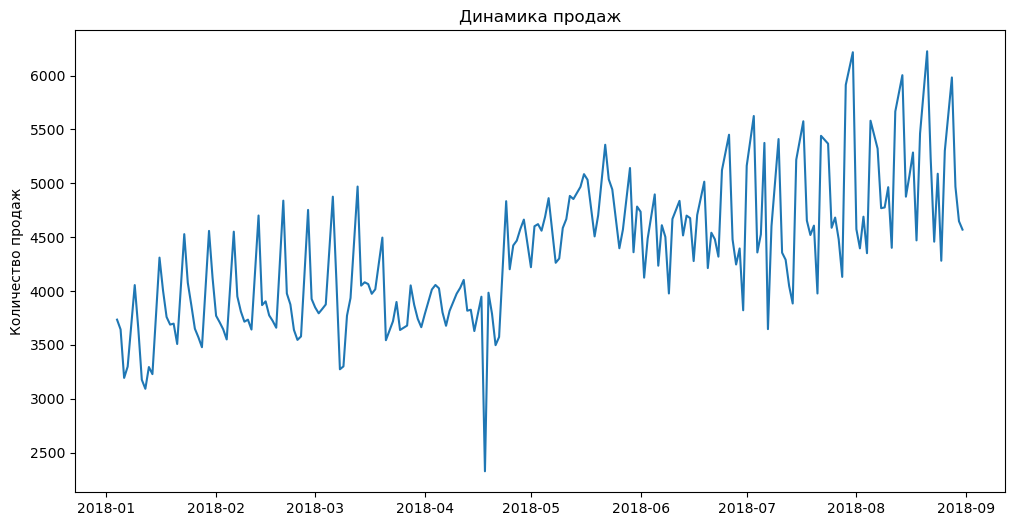

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df["Дата"], grouped_df["Количество"])
plt.ylabel("Количество продаж")
plt.title("Динамика продаж")
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

 На данном графике наблюдаем динамику продаж в течение определенного периода с янв. 2018 г. по сент. 2018 г. Показатель - количество продаж нестабилен. Показатели колебляться. Можно увидеть как периода роста, так и резкие спады. Можно отметить значительное падение в апреле 2018 г. В этот месяц продажи достигают минимума. После падения наблюдаем постеменное восстановление продаж. Пики - максимальные показатели по продажам приходится на конец лета - вавгусте месяце, что может быть связано с сезонным спросом. Так же стоит отметить следующее - к концу недели продажи (с пон. по по пятницу плавный спад, в будние дни они продажи ниже, а в выходные наблюдает резкие скачки, количество продаж выше) - это происходит ежемесячно.(совершение покупок в основном происходит в свободное время, в выходные, особенно в продуктовых магазинах). В начале марта месяца наблюдаем большую разницу между макс и мин. значениями (вероятно после 8 марта, наблюдается резкий спад в продажах). В период с мая месяца и до ориентировочно серидины июля наблюдаем, что колебания в продажах не так сильно выражены. И далее начиная с июля месяца и до сентября колебания в продажах достаточно резко выражены.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

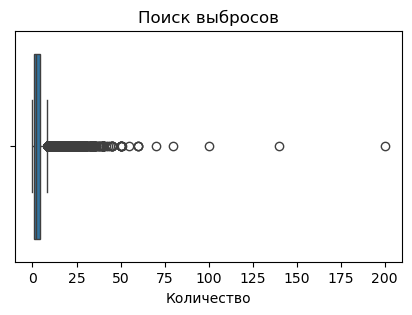

In [36]:
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.boxplot(x=df["Количество"])
plt.title("Поиск выбросов")
plt.show()

In [37]:
outlier_row = df[df["Количество"] == 200]
print(outlier_row)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [38]:
df["День недели"] = df["Дата"].dt.day_name()  
df["Месяц"] = df["Дата"].dt.month

In [39]:
filtered_df = df[(df["День недели"]=="Wednesday")&(df["Месяц"].isin([6, 7, 8]))&(df["Склад"] == 3)]

In [40]:
top_product = filtered_df.groupby("Номенклатура")["Количество"].sum().idxmax()
print(f"Топовый товар по продажам: {top_product}")

Топовый товар по продажам: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [41]:
weather_df = pd.read_csv("weather.csv")

In [42]:
print(weather_df.columns)

Index(['Дата;T'], dtype='object')


In [43]:
weather_df = pd.read_csv("weather.csv", sep=";")
print(weather_df.head())

         Дата        T
0  01.01.2018  -9.4625
1  02.01.2018  -9.5125
2  03.01.2018 -11.4625
3  04.01.2018 -14.0750
4  05.01.2018 -16.8625


In [44]:
weather_df["Дата"] = pd.to_datetime(weather_df["Дата"], format="%d.%m.%Y", dayfirst=True)
weather_df["Дата"] = weather_df["Дата"].dt.date  

grouped_df["Дата"] = pd.to_datetime(grouped_df["Дата"]).dt.date 

merged_df = grouped_df.merge(weather_df, on="Дата", how="left")

<Figure size 1200x600 with 0 Axes>

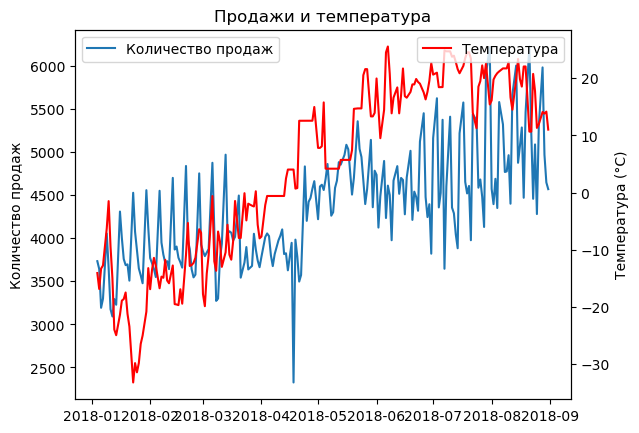

In [47]:
plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots()

ax1.plot(merged_df["Дата"], merged_df["Количество"], label="Количество продаж")
ax1.set_ylabel("Количество продаж")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(merged_df["Дата"], merged_df["T"], label="Температура", color="red")
ax2.set_ylabel("Температура (°C)")
ax2.legend(loc="upper right")

plt.title("Продажи и температура")
plt.show()

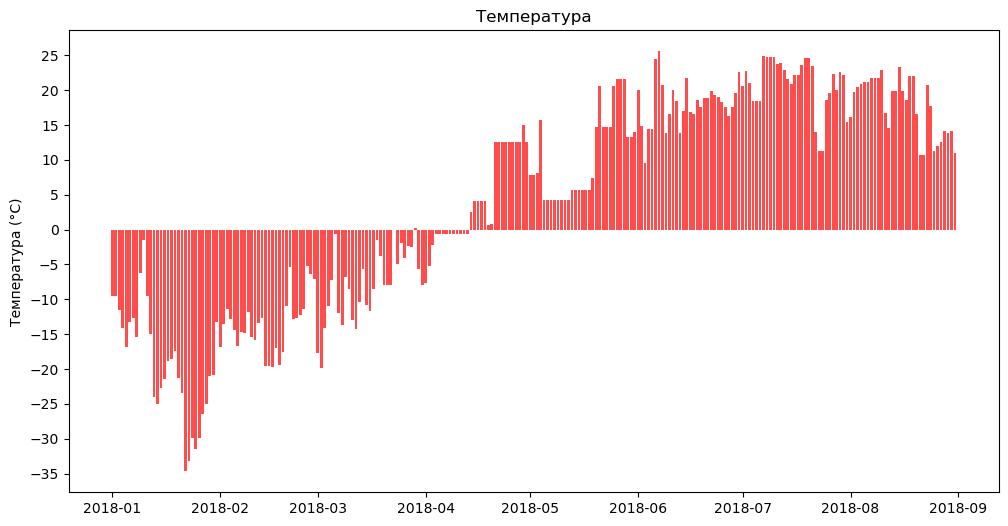

In [51]:
plt.figure(figsize=(12, 6))
plt.bar(weather_df["Дата"], weather_df["T"], color="red", alpha=0.7)
plt.ylabel("Температура (°C)")
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.title("Температура")
plt.show()